In [1]:
import importlib
import module
importlib.reload(module)

<module 'module' from '/home/kriva/data_science/Data_science_exam/module.py'>

In [2]:
from module import get_movies_with_directors
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = get_movies_with_directors()
df = df.dropna(subset=["popularity", "vote_average"])

In [ ]:
# Research question: Does movie popularity differ between directors, and which directors generally have higher or lower popularity?

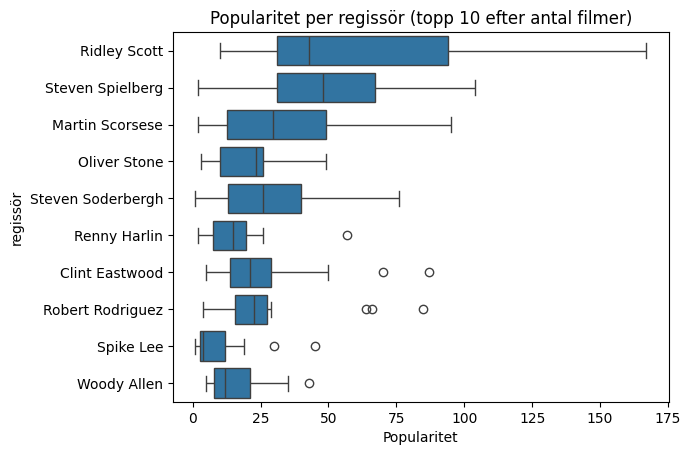

In [3]:
# The plot shows how popularity varies between movies for each director.
# Each box represents the distribution of popularity for a director’s movies.
# The box shows where most of the movies are located.
# The line inside the box represents the typical value (the median).
# The small circles represent individual movies that are much more popular than the rest.
#
# What we can see is that some directors have a wide spread,
# meaning their movies vary greatly in popularity.
# Others have a more consistent level, where movies tend to cluster
# around a similar popularity.

# Fetch joined data
df = get_movies_with_directors()
# Remove rows without a director or popularity value. 
df = df.dropna(subset=["director_name", "popularity"])

top_directors = df["director_name"].value_counts().head(10).index

df_top = df[df["director_name"].isin(top_directors)]


plt.figure()
sns.boxplot(
    data=df_top,
    x="popularity",
    y="director_name"
)


plt.xlabel("Popularitet")
plt.ylabel("regissör")
plt.title("Popularitet per regissör (topp 10 efter antal filmer)")
plt.show()

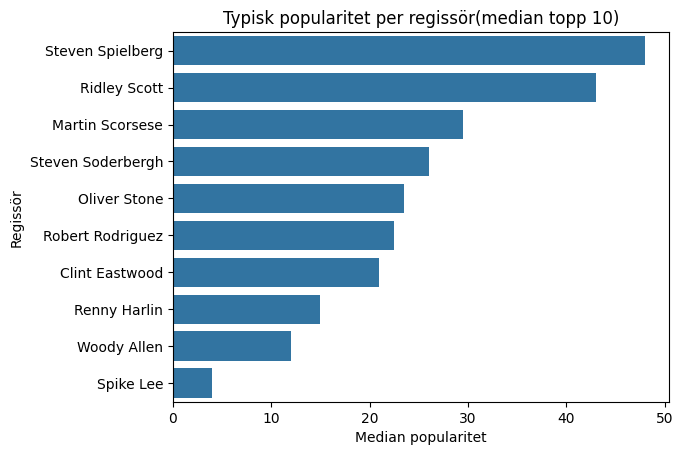

In [4]:
# This plot summarizes each director into a single value, the median popularity,
# which makes it easier to compare directors with each other.
#
# Each bar represents the typical popularity for a director.
# A higher bar means that the director’s movies are more often popular.
# The median is used to prevent individual blockbuster movies
# from having too much influence on the result.
#
# This makes it easy to see which directors generally have
# higher or lower popularity, without having to interpret
# distributions or extreme values.


summary = (
    df_top.groupby("director_name")
["popularity"]
    .median()
    .sort_values(ascending=False)
    .reset_index(name="median_popularity")
)

plt.figure()
sns.barplot(data=summary, x="median_popularity", y="director_name")
plt.xlabel("Median popularitet")
plt.ylabel("Regissör")
plt.title("Typisk popularitet per regissör(median topp 10)")

plt.show()

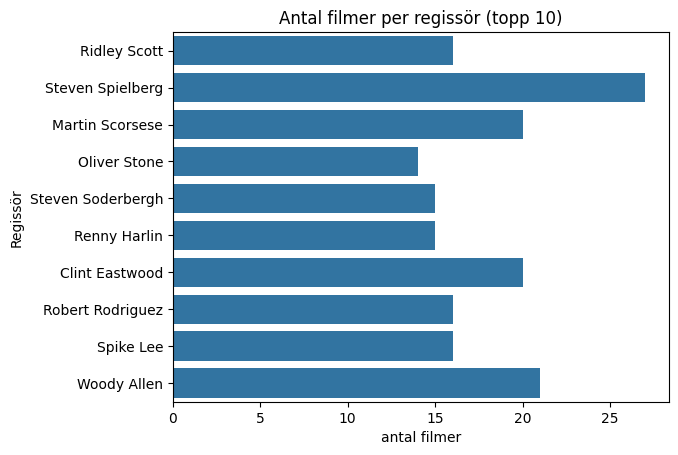

In [5]:
# This figure shows how many movies each director has compared to others (among the top 10).
# It makes the comparison easier to interpret, since a director with more movies
# has more data behind their results than one with fewer movies.
#
# The bars clearly show that some directors, such as Steven Spielberg and Woody Allen,
# have significantly more movies represented than others.
# At the same time, some directors have fewer movies,
# which means that their other results are based on a smaller data sample.

plt.figure()
sns.countplot(data=df_top, y="director_name")
plt.xlabel("antal filmer")
plt.ylabel("Regissör")
plt.title("Antal filmer per regissör (topp 10)")

plt.show()

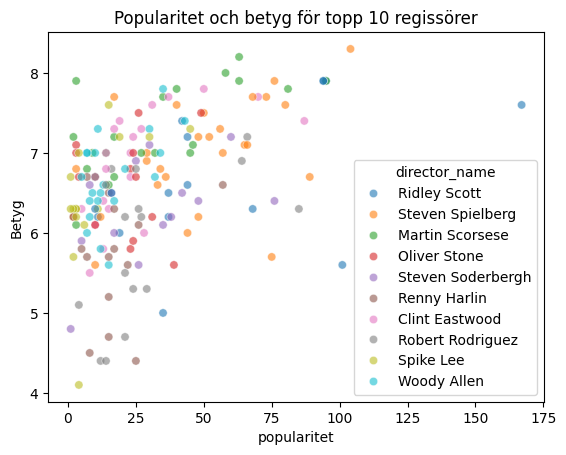

In [6]:
# This figure shows whether more popular movies also tend to receive higher ratings,
# and whether this relationship looks different across directors.
# If the points trend upwards to the right, the relationship is stronger.
# If they are more scattered, there is no clear relationship.
#
# We can see that movies with high popularity do not always have high ratings,
# and that the relationship between popularity and ratings varies between directors.
# For some directors, movies seem to cluster around a certain rating
# regardless of popularity, while others show a wider spread.

plt.figure()
sns.scatterplot(
    data=df_top,
    x="popularity",
    y="vote_average",
    hue="director_name",
    alpha=0.6
)

plt.xlabel("popularitet")
plt.ylabel("Betyg")
plt.title("Popularitet och betyg för topp 10 regissörer")

plt.show()

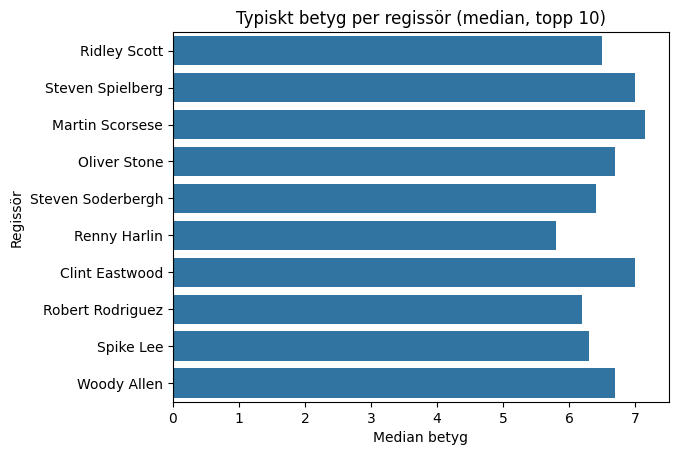

In [7]:
# This plot shows the rating that is most typical for each director.
# Using the median reduces the influence of individual extremely high or low ratings,
# resulting in a more stable comparison.
#
# The bars make it easy to compare directors with each other.
# We can see that some directors, such as Martin Scorsese and Steven Spielberg,
# generally have slightly higher ratings, while others have lower median values.

plt.figure()
sns.barplot(
    data=df_top,
    y="director_name",
    x="vote_average",
    estimator="median",
    errorbar=None
)

plt.xlabel("Median betyg")
plt.ylabel("Regissör")
plt.title("Typiskt betyg per regissör (median, topp 10)")

plt.show()